In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [14]:
# Read Datasets 
research_data = pd.read_csv('Datasets/bitcoin_research_data_v2.csv')

In [15]:
# Get datasets info
research_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1808 entries, 0 to 1807
Data columns (total 11 columns):
Unnamed: 0               1808 non-null int64
Date                     1808 non-null object
Symbol                   1808 non-null object
Open                     1808 non-null float64
High                     1808 non-null float64
Low                      1808 non-null float64
Close                    1808 non-null float64
Volume BTC               1808 non-null float64
Volume USD               1808 non-null float64
Popularity               1808 non-null float64
Popularity_Normalized    1808 non-null float64
dtypes: float64(8), int64(1), object(2)
memory usage: 155.5+ KB


In [16]:
research_data.head()

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,Popularity,Popularity_Normalized
0,0,2019-05-11,BTCUSD,6337.9,6984.8,6337.9,6793.5,9855.87,66133073.75,12.0,1200.0
1,1,2019-05-10,BTCUSD,6151.4,6430.0,6110.1,6337.9,9872.86,62166515.28,12.0,1200.0
2,2,2019-05-09,BTCUSD,5939.6,6174.0,5933.2,6151.4,7405.18,44816872.39,12.0,1200.0
3,3,2019-05-08,BTCUSD,5744.0,5983.2,5660.0,5939.6,6007.11,35184697.52,12.0,1200.0
4,4,2019-05-07,BTCUSD,5687.4,5955.8,5687.4,5906.7,3668.12,21496575.65,12.0,1200.0


In [17]:
# Drop unnecessary columns
research_data_cleaned = research_data.drop('Unnamed: 0', axis=1)
research_data_cleaned.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,Popularity,Popularity_Normalized
0,2019-05-11,BTCUSD,6337.9,6984.8,6337.9,6793.5,9855.87,66133073.75,12.0,1200.0
1,2019-05-10,BTCUSD,6151.4,6430.0,6110.1,6337.9,9872.86,62166515.28,12.0,1200.0
2,2019-05-09,BTCUSD,5939.6,6174.0,5933.2,6151.4,7405.18,44816872.39,12.0,1200.0
3,2019-05-08,BTCUSD,5744.0,5983.2,5660.0,5939.6,6007.11,35184697.52,12.0,1200.0
4,2019-05-07,BTCUSD,5687.4,5955.8,5687.4,5906.7,3668.12,21496575.65,12.0,1200.0


In [18]:
# Describe data
research_data_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1808.0,2.828273e+03,3.509464e+03,175.00,393.6050,715.375,4.601600e+03,1.935690e+04
High,1808.0,2.921099e+03,3.646383e+03,213.36,403.5275,737.215,4.733750e+03,1.966000e+04
Low,1808.0,2.725802e+03,3.342301e+03,175.00,380.2300,703.510,4.417825e+03,1.856710e+04
Close,1808.0,2.831168e+03,3.508585e+03,175.00,393.6050,716.685,4.633200e+03,1.935690e+04
Volume BTC,1808.0,2.906202e+03,3.791515e+03,0.00,54.6475,1376.820,4.452673e+03,2.879943e+04
Volume USD,1808.0,1.483528e+07,2.543748e+07,0.00,16818.0875,1043816.305,2.115854e+07,1.951901e+08
Popularity,1808.0,8.948562e+00,1.331119e+01,2.00,2.0000,4.000,1.100000e+01,1.000000e+02
Popularity_Normalized,1808.0,8.948562e+02,1.331119e+03,200.00,200.0000,400.000,1.100000e+03,1.000000e+04


In [19]:
# Find the Pearse Correlation value between the dependent variables (Close) and the other variables
research_data_cleaned.corr()[['Close']].sort_values('Close')

,Close
Volume BTC,0.499776
Volume USD,0.751260
Popularity_Normalized,0.820330
Popularity,0.820330
Open,0.997733
Low,0.998730
High,0.999070
Close,1.000000


In [24]:
# Find the Pearse Correlation value between the dependent variables (Open) and the other variables
research_data_cleaned.corr()[['Open']].sort_values('Open')

,Open,Close
Volume BTC,0.503095,0.499776
Volume USD,0.756050,0.751260
Popularity_Normalized,0.818289,0.820330
Popularity,0.818289,0.820330
Close,0.997733,1.000000
Low,0.997932,0.998730
High,0.998842,0.999070
Open,1.000000,0.997733


In [27]:
# Find the Pearse Correlation value between variables
research_data_cleaned.corr()[['Open', 'High', 'Low', 'Close', 'Volume BTC', 'Volume USD', 'Popularity', 'Popularity_Normalized']]

,Open,High,Low,Close,Volume BTC,Volume USD,Popularity,Popularity_Normalized
Open,1.000000,0.998842,0.997932,0.997733,0.503095,0.756050,0.818289,0.818289
High,0.998842,1.000000,0.997616,0.999070,0.508954,0.762566,0.828439,0.828439
Low,0.997932,0.997616,1.000000,0.998730,0.492456,0.740989,0.805611,0.805611
Close,0.997733,0.999070,0.998730,1.000000,0.499776,0.751260,0.820330,0.820330
Volume BTC,0.503095,0.508954,0.492456,0.499776,1.000000,0.835981,0.403287,0.403287
Volume USD,0.756050,0.762566,0.740989,0.751260,0.835981,1.000000,0.626234,0.626234
Popularity,0.818289,0.828439,0.805611,0.820330,0.403287,0.626234,1.000000,1.000000
Popularity_Normalized,0.818289,0.828439,0.805611,0.820330,0.403287,0.626234,1.000000,1.000000


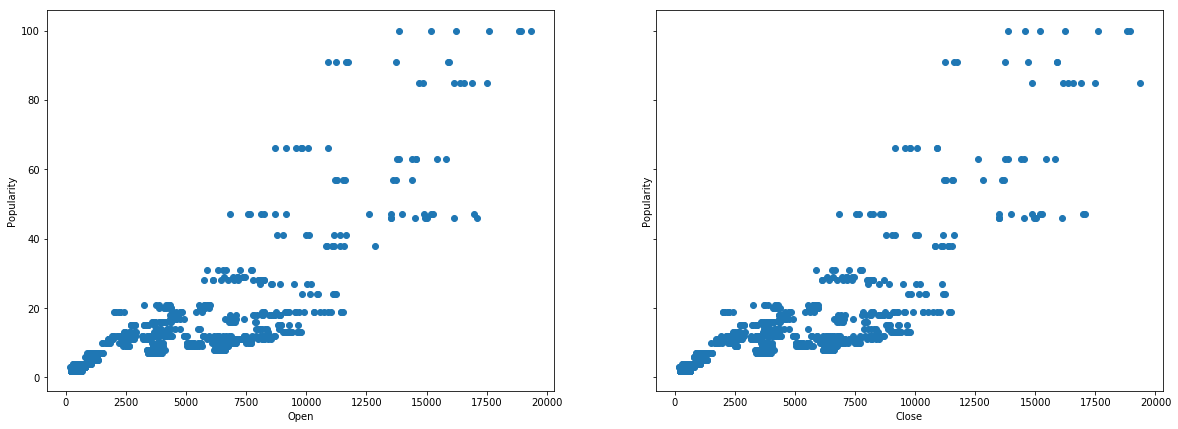

In [29]:
# Plot to verify linear relationship 

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [20, 7]

# call subplots specifying the grid structure we desire and that 
# the y axes should be shared
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)
axes[0].scatter(research_data_cleaned['Open'], research_data_cleaned['Popularity'])
axes[0].set(xlabel='Open', ylabel='Popularity')
axes[1].scatter(research_data_cleaned['Close'], research_data_cleaned['Popularity'])
axes[1].set(xlabel='Close', ylabel='Popularity')
plt.show()